In [7]:
import importlib
if not importlib.util.find_spec("hydesign"):
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/hydesign.git  



In [8]:

import os
import time
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydesign.assembly.hpp_assembly import hpp_model
from hydesign.examples import examples_filepath  

In [9]:
examples_sites = pd.read_csv(f'{examples_filepath}examples_sites.csv', index_col=0, sep=';')


print(type(examples_sites))
examples_sites

<class 'pandas.core.frame.DataFrame'>


,case,name,longitude,latitude,altitude,input_ts_fn,sim_pars_fn,price_fn,price_col,H2_demand_col,input_HA_ts_fn,price_up_ts,price_dwn_ts
0,India,Indian_site_good_wind,77.500226,8.334294,679.803454,India/GWA2/input_ts_Indian_site_good_wind.csv,India/hpp_pars.yml,India/Indian_elec_price_t.csv,Price,India/H2_demand.csv,NaN,NaN,NaN
1,India,Indian_site_good_solar,68.542204,23.542099,29.883557,India/GWA2/input_ts_Indian_site_good_solar.csv,India/hpp_pars.yml,India/Indian_elec_price_t.csv,Price,India/H2_demand.csv,NaN,NaN,NaN
2,India,Indian_site_bad_solar_bad_wind,77.916878,17.292316,627.424643,India/GWA2/input_ts_Indian_site_bad_solar_bad_...,India/hpp_pars.yml,India/Indian_elec_price_t.csv,Price,India/H2_demand.csv,NaN,NaN,NaN
3,Europe,France_good_solar,4.229736,44.422011,204.000000,Europe/GWA2/input_ts_France_good_solar.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,FR_R,Europe/H2_demand.csv,NaN,NaN,NaN
4,Europe,France_good_wind,-0.864258,48.744116,302.000000,Europe/GWA2/input_ts_France_good_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,FR_R,Europe/H2_demand.csv,NaN,NaN,NaN
5,Europe,France_bad_solar_n_wind,2.167969,47.428087,140.000000,Europe/GWA2/input_ts_France_bad_solar_n_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,FR_R,Europe/H2_demand.csv,NaN,NaN,NaN
6,Europe,Germany_bad_solar_n_wind,10.766602,49.310798,442.000000,Europe/GWA2/input_ts_Germany_bad_solar_n_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DE_ME,Europe/H2_demand.csv,NaN,NaN,NaN
7,Europe,Germany_good_wind,7.873535,53.287111,5.000000,Europe/GWA2/input_ts_Germany_good_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DE_NW,Europe/H2_demand.csv,NaN,NaN,NaN
8,Europe,Denmark_good_solar,11.813965,55.397760,42.000000,Europe/GWA2/input_ts_Denmark_good_solar.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DK_E,Europe/H2_demand.csv,NaN,NaN,NaN
9,Europe,Denmark_good_wind,8.594398,56.227322,85.000000,Europe/GWA2/input_ts_Denmark_good_wind.csv,Europe/hpp_pars.yml,Europe/2030-EL_PRICE.csv,DK_W,Europe/H2_demand.csv,NaN,NaN,NaN


In [10]:
name = 'Marijampole'
ex_site = examples_sites.loc[examples_sites.name == name]

longitude = ex_site['longitude'].values[0]
latitude = ex_site['latitude'].values[0]
altitude = ex_site['altitude'].values[0]

input_ts_fn = examples_filepath+ex_site['input_ts_fn'].values[0]
sim_pars_fn = examples_filepath+ex_site['sim_pars_fn'].values[0]

In [11]:
hpp = hpp_model(
        latitude=latitude,
        longitude=longitude,
        altitude=altitude,
        num_batteries = 5,
        work_dir = './',
        sim_pars_fn = sim_pars_fn,
        input_ts_fn = input_ts_fn,
)


Fixed parameters on the site
-------------------------------
longitude = 23.348694
latitude = 54.556137
altitude = 73.0


## 3D plot

C:\Users\escho\AppData\Local\Temp\ipykernel_22152\3589023167.py:95: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_22152\3589023167.py:95: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_22152\3589023167.py:95: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_22152\3589023167.py:95: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[q-1

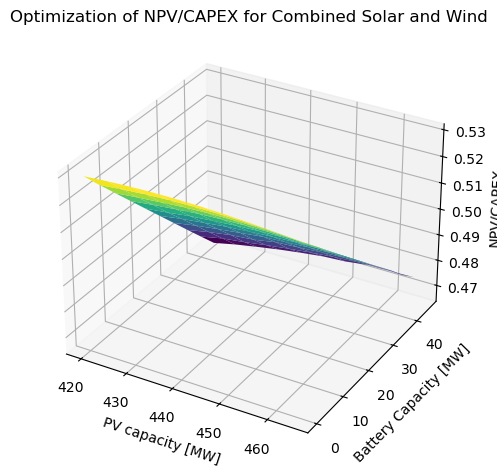

In [43]:
from mpl_toolkits.mplot3d import Axes3D  # kræves for 3D plotting

n = 10
k = 10
q = 0 

NPV_CAPEX = np.zeros(n*k)
MW = np.zeros(k)
bat_power = np.zeros(n)
Wind = np.zeros(n) 

test_start_val_wind = 0
test_start_val_solar = 420 
# Importér nødvendige moduler til 3D-plot
from mpl_toolkits.mplot3d import Axes3D  # kræves for 3D plotting


random = list(i for i in range(n*k))

for i in range(n):
    for j in range(k):
        q += 1 
        clearance = 10
        sp = 350
        p_rated = 5
        Nwt = 0
        wind_MW_per_km2 = 7
        solar_MW = test_start_val_solar + (5*j)
        surface_tilt = 50
        surface_azimuth = 180
        solar_DCAC = 1.5
        b_P = 5*i
        b_E_h  = 3
        cost_of_batt_degr = 10

        x = [clearance, sp, p_rated, Nwt, wind_MW_per_km2, \
        solar_MW, surface_tilt, surface_azimuth, solar_DCAC, \
        b_P, b_E_h , cost_of_batt_degr]

        outs = hpp.evaluate(*x)

        # hpp.print_design(x, outs)

        design_df = pd.DataFrame(columns = ['clearance [m]',
                                                'sp [W/m2]',
                                                'p_rated [MW]',
                                                'Nwt',
                                                'wind_MW_per_km2 [MW/km2]',
                                                'solar_MW [MW]',
                                                'surface_tilt [deg]',
                                                'surface_azimuth [deg]',
                                                'DC_AC_ratio',
                                                'b_P [MW]',
                                                'b_E_h [h]',
                                                'cost_of_battery_P_fluct_in_peak_price_ratio',
                                                'NPV_over_CAPEX',
                                                'NPV [MEuro]',
                                                'IRR',
                                                'LCOE [Euro/MWh]',
                                                'Revenues [MEuro]',
                                                'CAPEX [MEuro]',
                                                'OPEX [MEuro]',
                                                'Wind CAPEX [MEuro]',
                                                'Wind OPEX [MEuro]',
                                                'PV CAPEX [MEuro]',
                                                'PV OPEX [MEuro]',
                                                'Batt CAPEX [MEuro]',
                                                'Batt OPEX [MEuro]',
                                                'Shared CAPEX [MEuro]',
                                                'Shared OPEX [MEuro]',
                                                'penalty lifetime [MEuro]',
                                                'AEP [GWh]',
                                                'GUF',
                                                'grid [MW]',
                                                'wind [MW]',
                                                'solar [MW]',
                                                'Battery Energy [MWh]',
                                                'Battery Power [MW]',
                                                'Total curtailment [GWh]',
                                                'Total curtailment with deg [GWh]',
                                                
                                                'Awpp [km2]',
                                                'Apvp [km2]',
                                                'Plant area [km2]',
                                                'Rotor diam [m]',
                                                'Hub height [m]',
                                                'Number of batteries used in lifetime',
                                                'Break-even PPA price [Euro/MWh]',
                                                'Capacity factor wind [-]',
                                                
                                                ]  , index=range(1))
        design_df.iloc[0] =  list(x) + list(outs) 
        

        NPV_CAPEX[q-1] = design_df['NPV_over_CAPEX'] 
        MW[j] = solar_MW
        
        # MW[j] = test_start_val_solar + (j)        
        # NPV_CAPEX[q-1] = random[q-1]
   
    bat_power[i] = b_P 
    # Wind[i] = Nwt

# Antag at n (fx antal windscenarier) og k (fx antal solscenarier) er defineret
# og at NPV_CAPEX har størrelse n*k. Omform NPV_CAPEX til en 2D-matrix:
NPV_matrix = np.reshape(NPV_CAPEX, (n, k))

# Brug unikke værdier af MW (antager MW repræsenterer solcellekapacitet) og NWT (vindkapacitet)
solar = np.unique(MW)     # dimension: k elementer
# wind = np.unique(Wind)     # dimension: n elementer
battary_power = np.unique(bat_power)  # dimension: n elementer

# Opret et meshgrid
Solar_mesh, battery_mesh = np.meshgrid(solar, battary_power)

# Opret 3D-figuren
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Solar_mesh, battery_mesh, NPV_matrix, cmap='viridis')

ax.set_xlabel('PV capacity [MW]')
ax.set_ylabel('Battery Capacity [MW]')
ax.set_zlabel('NPV/CAPEX')
plt.title('Optimization of NPV/CAPEX for Combined Solar and Wind')
# plt.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig("3d_plot.png")  # gemmer 3D-plottet i samme mappe
plt.show()

# plt.plot(MW, NPV_CAPEX,'-o')
# plt.xlabel('NWT')
# plt.ylabel('NPV/CAPEX')
# plt.title(f'NPV/CAPEX in relation to WPP sizing')
# plt.grid()
# plt.tight_layout()
# plt.savefig("plot.png")
# plt.show()

# print(f'NPV/CAPEX: {NPV_CAPEX}')
# print(f'NWT: {MW}')
# print(f'Solar MW: {MW}')
# print(f'NWT: {NWT}')




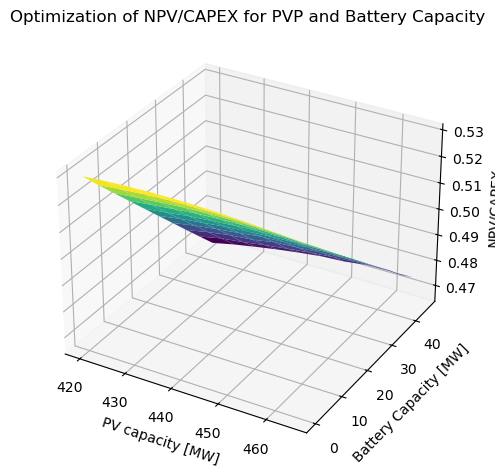

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Solar_mesh, battery_mesh, NPV_matrix, cmap='viridis')

ax.set_xlabel('PV capacity [MW]')
ax.set_ylabel('Battery Capacity [MW]')
ax.set_zlabel('NPV/CAPEX')
plt.title('Optimization of NPV/CAPEX for PVP and Battery Capacity')
# plt.colorbar(surf, shrink=0.5, aspect=5)


plt.tight_layout()
plt.savefig("3d_plot.png")  # gemmer 3D-plottet i samme mappe



plt.show()



In [45]:
max_NPV_CAPEX = np.max(NPV_CAPEX)
max_index = np.argmax(NPV_CAPEX)
print(f'Max NPV/CAPEX: {max_NPV_CAPEX} at index {max_index}')

print(NPV_CAPEX)

Max NPV/CAPEX: 0.5308254689223711 at index 4
[0.52954744 0.530182   0.53059963 0.53081    0.53082547 0.53065311
 0.53029425 0.52976334 0.52906827 0.52821523 0.52216293 0.522945
 0.52355803 0.52394691 0.52409489 0.52406142 0.52385403 0.52346519
 0.52283599 0.52212179 0.51494672 0.51572793 0.51641894 0.51705625
 0.51739904 0.51747729 0.51741996 0.51715751 0.5166202  0.51616193
 0.5077624  0.50874504 0.50955615 0.51032032 0.5107138  0.51095432
 0.51102217 0.51089498 0.51058939 0.51013285 0.50057474 0.50151562
 0.50262508 0.50330962 0.50403225 0.50446237 0.50466938 0.50446264
 0.50427615 0.50394699 0.49342763 0.49475633 0.49572404 0.49672609
 0.49735447 0.49795392 0.49834224 0.4984707  0.49842091 0.49820011
 0.48628041 0.48776174 0.48891699 0.48994744 0.49100418 0.49141577
 0.49197437 0.49228429 0.4923436  0.49224693 0.47912779 0.48076355
 0.48210517 0.48288273 0.48440907 0.48493253 0.48560983 0.48609542
 0.4863107  0.48631144 0.47204522 0.47383193 0.47489143 0.47623346
 0.47741542 0.47843

## 2 D ploting:

 

C:\Users\escho\AppData\Local\Temp\ipykernel_22152\4219493522.py:90: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[i] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_22152\4219493522.py:90: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[i] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_22152\4219493522.py:90: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[i] = design_df['NPV_over_CAPEX']
C:\Users\escho\AppData\Local\Temp\ipykernel_22152\4219493522.py:90: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  NPV_CAPEX[i] = desi

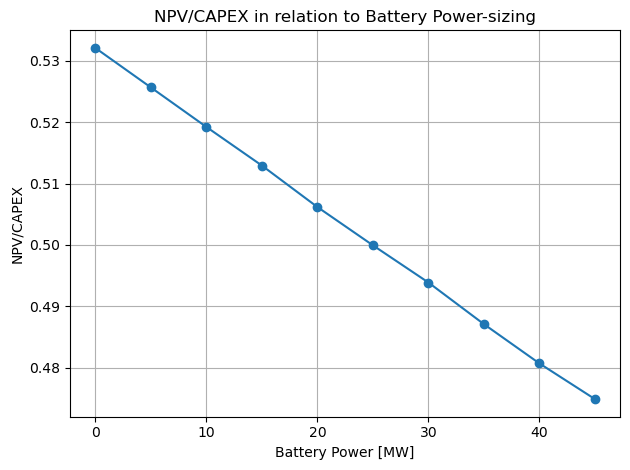

In [55]:
n = 10 

NPV_CAPEX = np.zeros(n)
Battery_power = np.zeros(n)
reverny = np.zeros(n)
curtalmint = np.zeros(n)
NPV = np.zeros(n)
AEP = np.zeros(n)




start_val_bat = 0.


# random = list(i for i in range(n*k))

for i in range(n):

    clearance = 10
    sp = 350
    p_rated = 5
    nwt = 1
    wind_MW_per_km2 = 7
    solar_MW = 436
    surface_tilt = 50
    surface_azimuth = 180
    solar_DCAC = 1.5
    b_P = start_val_bat + (5*i)
    b_E_h = 3
    cost_of_batt_degr = 10

    x = [clearance, sp, p_rated, nwt, wind_MW_per_km2, \
        solar_MW, surface_tilt, surface_azimuth, solar_DCAC, \
        b_P, b_E_h , cost_of_batt_degr]

    outs = hpp.evaluate(*x)

    # hpp.print_design(x, outs)

    design_df = pd.DataFrame(columns = ['clearance [m]',
                                                'sp [W/m2]',
                                                'p_rated [MW]',
                                                'Nwt',
                                                'wind_MW_per_km2 [MW/km2]',
                                                'solar_MW [MW]',
                                                'surface_tilt [deg]',
                                                'surface_azimuth [deg]',
                                                'DC_AC_ratio',
                                                'b_P [MW]',
                                                'b_E_h [h]',
                                                'cost_of_battery_P_fluct_in_peak_price_ratio',
                                                'NPV_over_CAPEX',
                                                'NPV [MEuro]',
                                                'IRR',
                                                'LCOE [Euro/MWh]',
                                                'Revenues [MEuro]',
                                                'CAPEX [MEuro]',
                                                'OPEX [MEuro]',
                                                'Wind CAPEX [MEuro]',
                                                'Wind OPEX [MEuro]',
                                                'PV CAPEX [MEuro]',
                                                'PV OPEX [MEuro]',
                                                'Batt CAPEX [MEuro]',
                                                'Batt OPEX [MEuro]',
                                                'Shared CAPEX [MEuro]',
                                                'Shared OPEX [MEuro]',
                                                'penalty lifetime [MEuro]',
                                                'AEP [GWh]',
                                                'GUF',
                                                'grid [MW]',
                                                'wind [MW]',
                                                'solar [MW]',
                                                'Battery Energy [MWh]',
                                                'Battery Power [MW]',
                                                'Total curtailment [GWh]',
                                                'Total curtailment with deg [GWh]',
                                                
                                                'Awpp [km2]',
                                                'Apvp [km2]',
                                                'Plant area [km2]',
                                                'Rotor diam [m]',
                                                'Hub height [m]',
                                                'Number of batteries used in lifetime',
                                                'Break-even PPA price [Euro/MWh]',
                                                'Capacity factor wind [-]',
                                                ]  , index=range(1))
    design_df.iloc[0] =  list(x) + list(outs)

    NPV_CAPEX[i] = design_df['NPV_over_CAPEX']
    reverny[i] = design_df['Revenues [MEuro]'].values[0]
    curtalmint[i] = design_df['Total curtailment [GWh]'].values[0]/25
    NPV[i] = design_df['NPV [MEuro]'].values[0]
    AEP[i] = design_df['AEP [GWh]'].values[0]
    Battery_power[i] = design_df['b_P [MW]'].values[0]


plt.plot(Battery_power, NPV_CAPEX,'-o')
plt.xlabel('Battery Power [MW]')
plt.ylabel('NPV/CAPEX')
plt.title(f'NPV/CAPEX in relation to Battery Power-sizing')
plt.grid()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()



In [ ]:
plt.plot(Battery_power, NPV_CAPEX,'-o')
plt.xlabel('Battery Power [MW]')
plt.ylabel('NPV/CAPEX')
plt.title(f'NPV/CAPEX in relation to Battery Power-sizing')
plt.grid()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()

plt.plot(Battery_power, NPV,'-o')
plt.xlabel('Battery Power [MW]')
plt.ylabel('NPV [MEuro]')
plt.title(f'NPV in relation to Battery Power-sizing')
plt.grid()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()

plt.plot(Battery_power, AEP,'-o')
plt.xlabel('Battery Power [MW]')
plt.ylabel('AEP [GWh]')
plt.title(f'AEP in relation to Battery Power-sizing')
plt.grid()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()

plt.plot(Battery_power, curtalmint,'-o')
plt.xlabel('Battery Power [MW]')
plt.ylabel('Curtailment [GWh]')
plt.title(f'Curtailment in relation to Battery Power-sizing')
plt.grid()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()

plt.plot(Battery_power, reverny,'-o')   
plt.xlabel('Battery Power [MW]')
plt.ylabel('Revenues [MEuro]')
plt.title(f'Revenues in relation to Battery Power-sizing')
plt.grid()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()





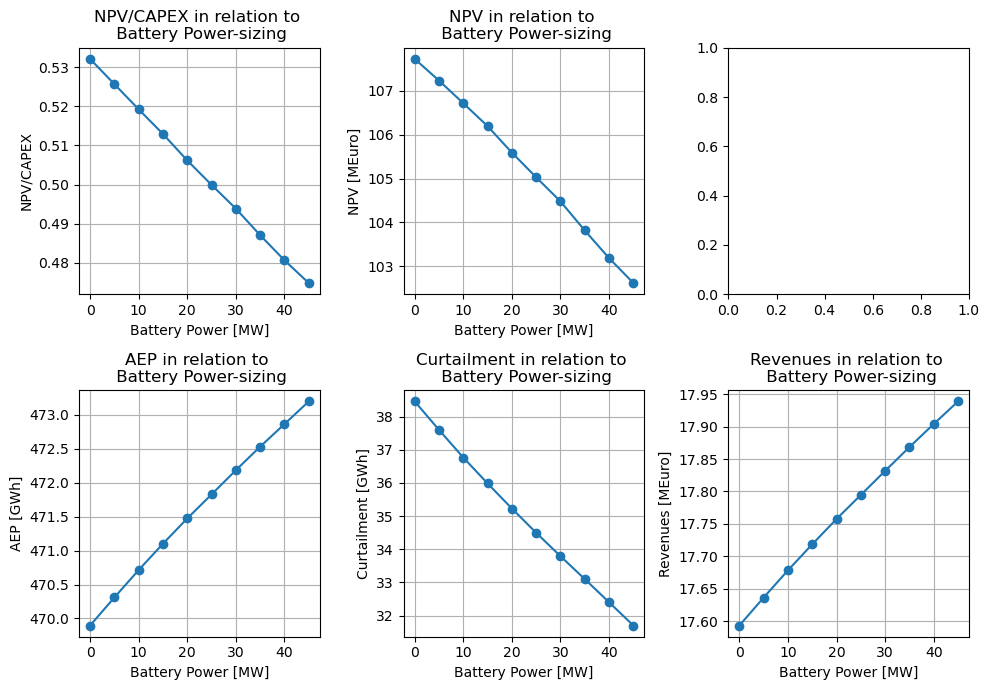

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

# Plot 1: NPV/CAPEX vs Battery Power
axs[0,0].plot(Battery_power, NPV_CAPEX, '-o')
axs[0,0].set_xlabel('Battery Power [MW]')
axs[0,0].set_ylabel('NPV/CAPEX')
axs[0,0].set_title('NPV/CAPEX in relation to \n Battery Power-sizing')
axs[0,0].grid(True)

# Plot 2: NPV vs Battery Power
axs[0,1].plot(Battery_power, NPV, '-o')
axs[0,1].set_xlabel('Battery Power [MW]')
axs[0,1].set_ylabel('NPV [MEuro]')
axs[0,1].set_title('NPV in relation to \n Battery Power-sizing')
axs[0,1].grid(True)

# Plot 3: AEP vs Battery Power
axs[1,0].plot(Battery_power, AEP, '-o')
axs[1,0].set_xlabel('Battery Power [MW]')
axs[1,0].set_ylabel('AEP [GWh]')
axs[1,0].set_title('AEP in relation to \n Battery Power-sizing')
axs[1,0].grid(True)

# Plot 4: Curtailment vs Battery Power
axs[1,1].plot(Battery_power, curtalmint, '-o')
axs[1,1].set_xlabel('Battery Power [MW]')
axs[1,1].set_ylabel('Curtailment [GWh]')
axs[1,1].set_title('Curtailment in relation to \n Battery Power-sizing')
axs[1,1].grid(True)

# Plot 5: Revenues vs Battery Power
axs[1,2].plot(Battery_power, reverny, '-o')
axs[1,2].set_xlabel('Battery Power [MW]')
axs[1,2].set_ylabel('Revenues [MEuro]')
axs[1,2].set_title('Revenues in relation to \n Battery Power-sizing')
axs[1,2].grid(True)

plt.tight_layout()
plt.savefig("subplot_plots.png")
plt.show()


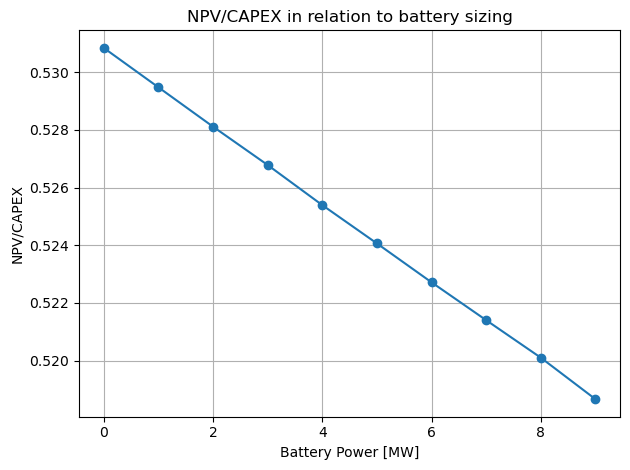

In [41]:
plt.plot(Battery_power, NPV_CAPEX,'-o')
plt.xlabel('Battery Power [MW]')
plt.ylabel('NPV/CAPEX')
plt.title(f'NPV/CAPEX in relation to battery sizing')
plt.grid()
plt.tight_layout()
plt.savefig("plot.png")
plt.show()


In [ ]:
max_NPV_CAPEX = np.max(NPV_CAPEX)
max_index = np.argmax(NPV_CAPEX)
print(f'Max NPV/CAPEX: {max_NPV_CAPEX} at index {max_index}')

print(NPV_CAPEX)


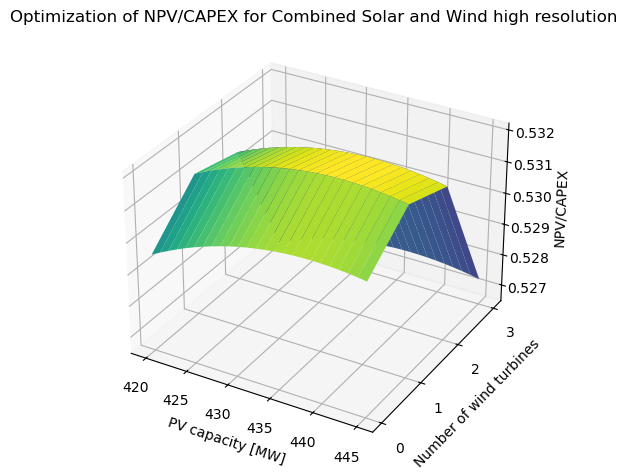

In [25]:
# Gemmer 3D-plottet i samme mappe

n = 4
k = 25
q = 0 
# 3D plot af NPV/CAPEX for kombineret sol og vind

NPV_CAPEX_2 = np.array([0.52954744, 0.52969197, 0.5298272,  0.52995409, 0.53007278, 0.530182,
 0.53028247, 0.53037338, 0.53045711, 0.53053332, 0.53059963, 0.5306576,
 0.53070639, 0.53074831, 0.53078319, 0.53081, 0.53082797, 0.53083739,
 0.53084089, 0.53083646, 0.53082547, 0.53080564, 0.53077747, 0.53074274,
 0.53070134, 0.53099728, 0.53112924, 0.53125228, 0.53136648, 0.53147207,
 0.53156857, 0.53165681, 0.53173638, 0.53180847, 0.53187288, 0.53192786,
 0.53197466, 0.53201343, 0.53204477, 0.53206938, 0.53208591, 0.53209381,
 0.53209409, 0.53208713, 0.53207336, 0.53205221, 0.53202283, 0.53198608,
 0.53194226, 0.53189218, 0.53065249, 0.53077483, 0.53088844, 0.53099303,
 0.53109023, 0.53117873, 0.53125879, 0.53133059, 0.53139468, 0.53145081,
 0.53149794, 0.53153784, 0.53156979, 0.53159447, 0.53161194, 0.5316213,
 0.53162234, 0.53161657, 0.53160359, 0.53158366, 0.53155616, 0.53152091,
 0.53147827, 0.53142889, 0.53137328, 0.52658933, 0.52670994, 0.52682125,
 0.52692425, 0.52702006, 0.52710735, 0.52718662, 0.5272572, 0.52731976,
 0.52737544, 0.52742258, 0.52746232, 0.52749402, 0.5275183, 0.52753549,
 0.52754541, 0.52754684, 0.52754107, 0.52752839, 0.5275089, 0.52748257,
 0.52744856, 0.52740688, 0.5273587, 0.52730468])

# Max NPV/CAPEX: 0.5320940908953495 at index 42
# svarende til 436MW sol og 1 vindmølle

NPV_matrix = np.reshape(NPV_CAPEX_2, (n, k))

MW = np.linspace(420, 445, k)  # Antager at solcellekapaciteten varierer fra 420 til 436 MW
NWT = np.array([0, 1, 2, 3])  # Antager at vindkapaciteten er 1 til 4 NWT

# Brug unikke værdier af MW (antager MW repræsenterer solcellekapacitet) og NWT (vindkapacitet)
solar = np.unique(MW)     # dimension: k elementer
wind = np.unique(NWT)     # dimension: n elementer

# Opret et meshgrid
Solar_mesh, Wind_mesh = np.meshgrid(solar, wind)

# Opret 3D-figuren
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Solar_mesh, Wind_mesh, NPV_matrix, cmap='viridis')

ax.set_xlabel('PV capacity [MW]')
ax.set_ylabel('Number of wind turbines')
ax.set_zlabel('NPV/CAPEX') 
plt.title('Optimization of NPV/CAPEX for Combined Solar and Wind high resolution')
# plt.colorbar(surf, shrink=0.5, aspect=5)

ax.set_yticks(np.arange(np.min(wind), np.max(wind) + 1, 1))

plt.tight_layout()
plt.savefig("3d_plot.png")  # saves the 3D plot in the same folder
plt.show()

In [ ]:
df_latvia_corbon_intensity = pd.read_csv('LV_2024_hourly.csv', index_col=0, parse_dates=True)

plt.figure(figsize=(10, 5))
plt.plot(df_latvia_corbon_intensity.index, df_latvia_corbon_intensity['Renewable energy percentage (RE%)'], label='Latvia CO2 Intensity', color='blue')
plt.xlabel('Date')
plt.ylabel('Renewable energy percentage (RE%)')
plt.title('Latvia CO2 Intensity 2024')
plt.xticks(rotation=45)
plt.grid()
plt.show()

df_latvia_corbon_intensity.describe()

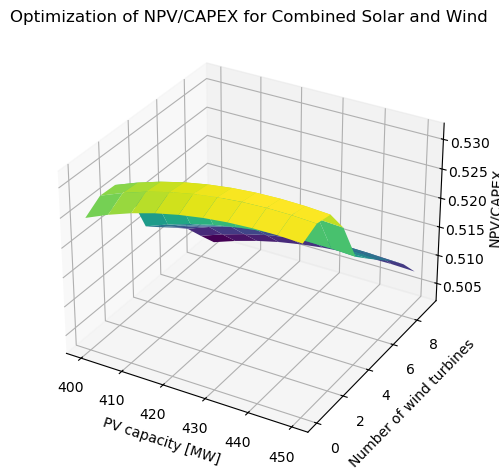

In [31]:
#71/438 0.357302449390809
#70/437 0.36047169391554174
#69/436 0.35241145038095223

# Max NPV/CAPEX: 0.5320859062348365 at index 17

# 3D plot af NPV/CAPEX for kombineret sol og vind
n = 10
k = 10


NPV_CAPEX_1 = np.array([0.52454926, 0.52619193, 0.52756907, 0.52868381, 0.52954744, 0.530182,
 0.53059963, 0.53081, 0.53082547, 0.53065311, 0.52631365, 0.52786913,
 0.52916559, 0.53020352, 0.53099728, 0.53156857, 0.53192786, 0.53208591,
 0.53205221, 0.53183447, 0.5262014, 0.52769173, 0.52892586, 0.52990829,
 0.53065249, 0.53117873, 0.53149794, 0.5316213, 0.53155616, 0.53131031,
 0.52222005, 0.5236825, 0.52489299, 0.52585864, 0.52658933, 0.52710735,
 0.52742258, 0.52754541, 0.52748257, 0.52724303, 0.51527981, 0.51674307,
 0.51795899, 0.51893463, 0.51967932, 0.52021608, 0.52055315, 0.52070026,
 0.52066538, 0.5204559, 0.51316264, 0.5145826, 0.51575905, 0.51670064,
 0.51741673, 0.51793009, 0.51824679, 0.51837669, 0.51832898, 0.51810912,
 0.51111603, 0.51249218, 0.51363134, 0.51453985, 0.51522843, 0.51571765,
 0.51601405, 0.5161268, 0.51606531, 0.51583512, 0.50894897, 0.51040247,
 0.51157166, 0.51244779, 0.51310906, 0.51357426, 0.51385047, 0.51394706,
 0.51387168, 0.5136302, 0.50567476, 0.50709383, 0.50828435, 0.50925216,
 0.510008, 0.5105691, 0.51094401, 0.51114177, 0.51116751, 0.51102901,
 0.50251201, 0.50389685, 0.50505938, 0.50600263, 0.50673784, 0.50728214,
 0.50764399, 0.50783055, 0.50784902, 0.5077038 ])

# # Max NPV/CAPEX: 0.5320859062348365 at index 17
# # svarende til 435MW sol og 1 vindmølle

MW = np.linspace(400, 450, k)  # Antager at solcellekapaciteten varierer fra 420 til 436 MW
NWT = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

NPV_matrix = np.reshape(NPV_CAPEX_1, (n, k))

# Brug unikke værdier af MW (antager MW repræsenterer solcellekapacitet) og NWT (vindkapacitet)
solar = np.unique(MW)     # dimension: k elementer
wind = np.unique(NWT)     # dimension: n elementer

# Opret et meshgrid
Solar_mesh, Wind_mesh = np.meshgrid(solar, wind)

# Opret 3D-figuren
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Solar_mesh, Wind_mesh, NPV_matrix, cmap='viridis')

ax.set_xlabel('PV capacity [MW]')
ax.set_ylabel('Number of wind turbines')
ax.set_zlabel('NPV/CAPEX')
plt.title('Optimization of NPV/CAPEX for Combined Solar and Wind')
# plt.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.savefig("3d_plot.png")  # saves the 3D plot in the same folder
plt.show()
